In [1]:
import pandas as pd

In [2]:
#https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [3]:
#from nsepy import get_history as gh
import datetime as dt

In [4]:

stk_data=pd.read_csv("edited_dataset.csv")
stk_data

,id,room_id/id,temp,out/in,date,time
0,__export__.temp_log_196134_bd201015,Room Admin,29,In,2018-12-08,09:30:00
1,__export__.temp_log_196131_7bca51bc,Room Admin,29,In,2018-12-08,09:30:00
2,__export__.temp_log_196127_522915e3,Room Admin,41,Out,2018-12-08,09:29:00
3,__export__.temp_log_196128_be0919cf,Room Admin,41,Out,2018-12-08,09:29:00
4,__export__.temp_log_196126_d30b72fb,Room Admin,31,In,2018-12-08,09:29:00
...,...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,31,In,2018-07-28,07:07:00
97602,__export__.temp_log_147733_62c03f31,Room Admin,31,In,2018-07-28,07:07:00
97603,__export__.temp_log_100386_84093a68,Room Admin,31,In,2018-07-28,07:06:00
97604,__export__.temp_log_123297_4d8e690b,Room Admin,31,In,2018-07-28,07:06:00


In [5]:
stk_data=stk_data[["temp","out/in"]]
#stk_data.to_csv("Tatacoffee13_21.csv")
stk_data

,temp,out/in
0,29,In
1,29,In
2,41,Out
3,41,Out
4,31,In
...,...,...
97601,31,In
97602,31,In
97603,31,In
97604,31,In


In [6]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[["temp"]])
print("Len:",data1.shape)

Len: (97606, 1)


In [7]:
"""from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(stk_data), len(stk_data)-1)
print(y_pred)
from stockFunctions import rmsemape
rmsemape(stkk,predicted_stock_price_test_oriP["Open"])"""

'from statsmodels.tsa.arima.model import ARIMA\nmodel = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)\nmodel_fit = model.fit()\n# make prediction\ny_pred= model_fit.predict(len(stk_data), len(stk_data)-1)\nprint(y_pred)\nfrom stockFunctions import rmsemape\nrmsemape(stkk,predicted_stock_price_test_oriP["Open"])'

In [8]:
orders=[(1,1,1),(1,1,2),(2,3,1),(2,2,2)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(data1, order=i)
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)
    

RMSE-Testset: 0.08263734834693813
maPe-Testset: 9055804332.624924
RMSE-Testset: 0.08269700844337638
maPe-Testset: 7920712907.960819


D:\anaconda3\envs\aiml2\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE-Testset: 0.12322526711232323
maPe-Testset: 1554141478.5570312


D:\anaconda3\envs\aiml2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\anaconda3\envs\aiml2\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE-Testset: 0.08303090743445478
maPe-Testset: 5370272867.55178


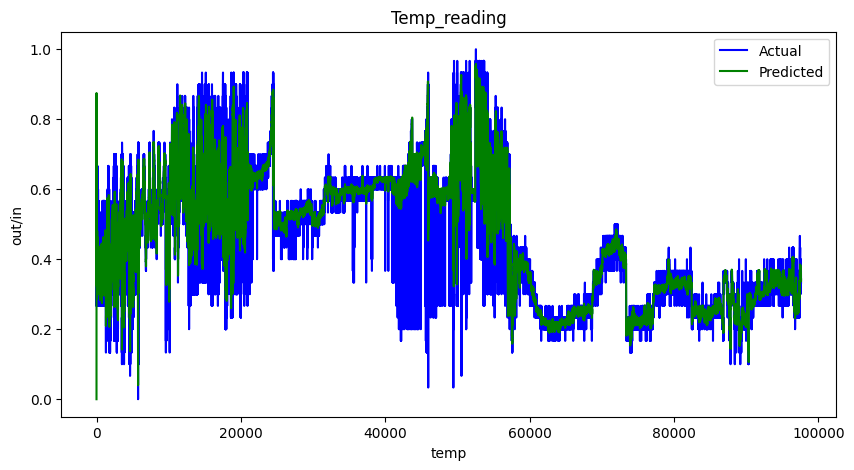

In [9]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","Temp_reading","temp","out/in")

In [10]:
len(data1)

97606

In [11]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["temp"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["temp"])

In [12]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["temp"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["temp"])

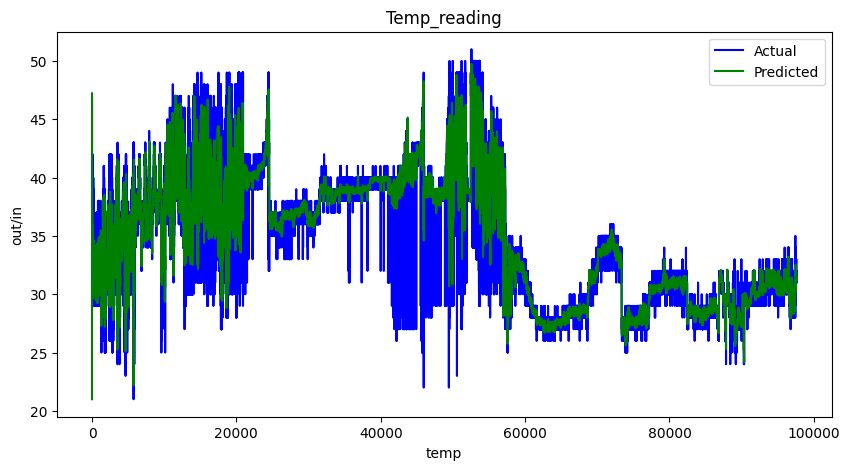

In [13]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Temp_reading","temp","out/in")

In [20]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 2.4909272230336432
maPe-Testset: 0.035273164792695176


In [21]:
forecast=model_fit.predict(len(data1), len(data1)+5)

In [22]:
forecast

array([0.33907522, 0.33925413, 0.33947524, 0.33939412, 0.33930054,
       0.33918982])

In [23]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Temperature"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Temperatur"])

In [24]:
forecast_stock_price_test_oriF.to_csv("Temperature.csv",index=False)

In [25]:
forecast_stock_price_test_oriF

,Temperatur
0,31.172257
1,31.177624
2,31.184257
3,31.181824
4,31.179016
5,31.175695
